In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Creating Elo dictionary to store all the Elo changes for all NBA teams.

In [2]:
teams_elo_standard = {
    'ATL': [1500],
    'BKN': [1500],
    'BOS': [1500],
    'CHA': [1500],
    'CHI': [1500],
    'CLE': [1500],
    'DAL': [1500],
    'DEN': [1500],
    'DET': [1500],
    'GSW': [1500],
    'HOU': [1500],
    'IND': [1500],
    'LAC': [1500],
    'LAL': [1500],
    'MEM': [1500],
    'MIA': [1500],
    'MIL': [1500],
    'MIN': [1500],
    'NOP': [1500],
    'NYK': [1500],
    'OKC': [1500],
    'ORL': [1500],
    'PHI': [1500],
    'PHX': [1500],
    'POR': [1500],
    'SAC': [1500],
    'SAS': [1500],
    'TOR': [1500],
    'UTA': [1500],
    'WAS': [1500],
}

K factor is set to adjust the sensitivity of elo rating to a game. The higher the K factor, the more adjustment in the elo rating from the most recent game, vice versa for low K factor. Hence, from FiveThirtyEight, the recommended K factor for NBA games is 20. 

In [3]:
K_FACTOR = 20

Reading in CSV file. 
Changing the datetime column to datetime date type.
Sort the df from earliest to latest.

In [4]:
season_2014 = pd.read_csv("data_for_elo_algo.csv")
season_2014['GAME_DATE'] = pd.to_datetime(season_2014['GAME_DATE'])
season_2014 = season_2014.sort_values(by = "GAME_DATE", ascending = True)
season_2014.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,EFG
2459,22014,1610612747,LAL,Los Angeles Lakers,21400003,2014-10-28,LAL vs. HOU,L,240,90,...,11.0,25.0,36.0,16,7.0,3,11,32,-18.0,0.373418
2454,22014,1610612740,NOP,New Orleans Pelicans,21400001,2014-10-28,NOP vs. ORL,W,240,101,...,26.0,36.0,62.0,20,10.0,17,9,17,17.0,0.425743
2455,22014,1610612753,ORL,Orlando Magic,21400001,2014-10-28,ORL @ NOP,L,239,84,...,16.0,40.0,56.0,17,5.0,9,18,25,-17.0,0.404762
2458,22014,1610612745,HOU,Houston Rockets,21400003,2014-10-28,HOU @ LAL,W,241,108,...,14.0,33.0,47.0,22,7.0,3,13,30,18.0,0.506849
2457,22014,1610612742,DAL,Dallas Mavericks,21400002,2014-10-28,DAL @ SAS,L,239,100,...,9.0,24.0,33.0,17,9.0,3,10,20,-1.0,0.538462


Checking what columns do I have to work with.

In [5]:
season_2014.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'EFG'],
      dtype='object')

Adding a new column for Home Court. Should add 1 more column for conference. 

In [6]:
season_2014['HOME_COURT'] = np.where(season_2014['MATCHUP'].str.contains('vs.'), 'H', 'A')

In [7]:
season_2014.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,EFG,HOME_COURT
2459,22014,1610612747,LAL,Los Angeles Lakers,21400003,2014-10-28,LAL vs. HOU,L,240,90,...,25.0,36.0,16,7.0,3,11,32,-18.0,0.373418,H
2454,22014,1610612740,NOP,New Orleans Pelicans,21400001,2014-10-28,NOP vs. ORL,W,240,101,...,36.0,62.0,20,10.0,17,9,17,17.0,0.425743,H
2455,22014,1610612753,ORL,Orlando Magic,21400001,2014-10-28,ORL @ NOP,L,239,84,...,40.0,56.0,17,5.0,9,18,25,-17.0,0.404762,A
2458,22014,1610612745,HOU,Houston Rockets,21400003,2014-10-28,HOU @ LAL,W,241,108,...,33.0,47.0,22,7.0,3,13,30,18.0,0.506849,A
2457,22014,1610612742,DAL,Dallas Mavericks,21400002,2014-10-28,DAL @ SAS,L,239,100,...,24.0,33.0,17,9.0,3,10,20,-1.0,0.538462,A


Checking for any null values and get summary of the dataset.

In [62]:
season_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2460 entries, 2459 to 0
Data columns (total 30 columns):
SEASON_ID            2460 non-null int64
TEAM_ID              2460 non-null int64
TEAM_ABBREVIATION    2460 non-null object
TEAM_NAME            2460 non-null object
GAME_ID              2460 non-null int64
GAME_DATE            2460 non-null datetime64[ns]
MATCHUP              2460 non-null object
WL                   2460 non-null object
MIN                  2460 non-null int64
PTS                  2460 non-null int64
FGM                  2460 non-null int64
FGA                  2460 non-null int64
FG_PCT               2460 non-null float64
FG3M                 2460 non-null int64
FG3A                 2460 non-null float64
FG3_PCT              2460 non-null float64
FTM                  2460 non-null int64
FTA                  2460 non-null int64
FT_PCT               2460 non-null float64
OREB                 2460 non-null float64
DREB                 2460 non-null float64
REB    

Merging the same df together so to have data for each team in 1 data row. Drop the data rows where same team are merged with the same team, ie. LAL merged with LAL. Further drop duplicate data rows, ie. LAL vs HOU on 01/01 is same as HOU vs LAL on 01/01.  

In [8]:
season_2014_merged = season_2014.merge(season_2014, on ='GAME_ID')
season_2014_merged = season_2014_merged.drop(season_2014_merged[season_2014_merged['TEAM_ID_x'] == season_2014_merged['TEAM_ID_y']].index)
season_2014_merged_filtered = season_2014_merged.iloc[::2]
season_2014_merged_filtered.head()

,SEASON_ID_x,TEAM_ID_x,TEAM_ABBREVIATION_x,TEAM_NAME_x,GAME_ID,GAME_DATE_x,MATCHUP_x,WL_x,MIN_x,PTS_x,...,DREB_y,REB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,PLUS_MINUS_y,EFG_y,HOME_COURT_y
1,22014,1610612747,LAL,Los Angeles Lakers,21400003,2014-10-28,LAL vs. HOU,L,240,90,...,33.0,47.0,22,7.0,3,13,30,18.0,0.506849,A
5,22014,1610612740,NOP,New Orleans Pelicans,21400001,2014-10-28,NOP vs. ORL,W,240,101,...,40.0,56.0,17,5.0,9,18,25,-17.0,0.404762,A
9,22014,1610612742,DAL,Dallas Mavericks,21400002,2014-10-28,DAL @ SAS,L,239,100,...,29.0,38.0,23,5.0,3,20,20,1.0,0.628571,H
13,22014,1610612764,WAS,Washington Wizards,21400007,2014-10-29,WAS @ MIA,L,240,95,...,32.0,44.0,20,9.0,3,14,17,12.0,0.537037,H
17,22014,1610612760,OKC,Oklahoma City Thunder,21400015,2014-10-29,OKC @ POR,L,241,89,...,29.0,42.0,23,4.0,9,10,19,17.0,0.511494,H


In [11]:
season_2014_merged_filtered.to_csv('season_2014_merged_filtered.csv',index=False)

Checking for the summary newly merged df, 1230 is half of original data rows (2460), which is good. 

In [188]:
season_2014_merged_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 1 to 4917
Data columns (total 59 columns):
SEASON_ID_x            1230 non-null int64
TEAM_ID_x              1230 non-null int64
TEAM_ABBREVIATION_x    1230 non-null object
TEAM_NAME_x            1230 non-null object
GAME_ID                1230 non-null int64
GAME_DATE_x            1230 non-null datetime64[ns]
MATCHUP_x              1230 non-null object
WL_x                   1230 non-null object
MIN_x                  1230 non-null int64
PTS_x                  1230 non-null int64
FGM_x                  1230 non-null int64
FGA_x                  1230 non-null int64
FG_PCT_x               1230 non-null float64
FG3M_x                 1230 non-null int64
FG3A_x                 1230 non-null float64
FG3_PCT_x              1230 non-null float64
FTM_x                  1230 non-null int64
FTA_x                  1230 non-null int64
FT_PCT_x               1230 non-null float64
OREB_x                 1230 non-null float64
DREB_x    

2 ways of calculating elo for NBA teams throughout season, both produce same results. 

In [185]:
for i, row in season_2014_merged_filtered.iterrows():
    if row['WL_x'] == 'W':
        elo_change = K_FACTOR * (1 - (10**(teams_elo_standard[row['TEAM_ABBREVIATION_x']][-1]/400) / (10**(teams_elo_standard[row['TEAM_ABBREVIATION_x']][-1]/400) + 10**(teams_elo_standard[row['TEAM_ABBREVIATION_y']][-1]/400))))
        teams_elo_standard[row['TEAM_ABBREVIATION_x']].append(teams_elo_standard[row['TEAM_ABBREVIATION_x']][-1] + elo_change)
        teams_elo_standard[row['TEAM_ABBREVIATION_y']].append(teams_elo_standard[row['TEAM_ABBREVIATION_y']][-1] - elo_change)
    elif row['WL_x'] == 'L':
        elo_change = K_FACTOR * (1 - (10**(teams_elo_standard[row['TEAM_ABBREVIATION_y']][-1]/400) / (10**(teams_elo_standard[row['TEAM_ABBREVIATION_x']][-1]/400) + 10**(teams_elo_standard[row['TEAM_ABBREVIATION_y']][-1]/400))))
        teams_elo_standard[row['TEAM_ABBREVIATION_x']].append(teams_elo_standard[row['TEAM_ABBREVIATION_x']][-1] - elo_change)
        teams_elo_standard[row['TEAM_ABBREVIATION_y']].append(teams_elo_standard[row['TEAM_ABBREVIATION_y']][-1] + elo_change)


In [181]:
for i, row in season_2014_merged_filtered.iterrows():
    P_x = (10**(teams_elo_standard[row['TEAM_ABBREVIATION_x']][-1]/400) / (10**(teams_elo_standard[row['TEAM_ABBREVIATION_x']][-1]/400) + 10**(teams_elo_standard[row['TEAM_ABBREVIATION_y']][-1]/400)))
    P_y = (10**(teams_elo_standard[row['TEAM_ABBREVIATION_y']][-1]/400) / (10**(teams_elo_standard[row['TEAM_ABBREVIATION_x']][-1]/400) + 10**(teams_elo_standard[row['TEAM_ABBREVIATION_y']][-1]/400)))
    if row['WL_x'] == 'W':
        teams_elo_standard[row['TEAM_ABBREVIATION_x']].append(teams_elo_standard[row['TEAM_ABBREVIATION_x']][-1] + K_FACTOR * (1 - P_x))
        teams_elo_standard[row['TEAM_ABBREVIATION_y']].append(teams_elo_standard[row['TEAM_ABBREVIATION_y']][-1] + K_FACTOR * (0 - P_y))
    elif row['WL_x'] == 'L':
        teams_elo_standard[row['TEAM_ABBREVIATION_x']].append(teams_elo_standard[row['TEAM_ABBREVIATION_x']][-1] + K_FACTOR * (0 - P_x))
        teams_elo_standard[row['TEAM_ABBREVIATION_y']].append(teams_elo_standard[row['TEAM_ABBREVIATION_y']][-1] + K_FACTOR * (1 - P_y))

In [189]:
elo_standard_df = pd.DataFrame(data = teams_elo_standard)
elo_standard_df.head()

,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
0,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
1,1490.000000,1490.000000,1510.000000,1510.000000,1510.000000,1489.712256,1490.000000,1510.000000,1490.000000,1510.000000,...,1490.000000,1490.000000,1490.000000,1509.712256,1510.000000,1490.000000,1510.000000,1510.000000,1490.287744,1490.000000
2,1500.287744,1499.712256,1500.279468,1500.287744,1499.416735,1500.295522,1500.008282,1499.146891,1480.000000,1518.885951,...,1480.287744,1480.000000,1480.000000,1519.720538,1499.424989,1500.575011,1499.991718,1519.138670,1480.279462,1500.000000
3,1490.279223,1509.465602,1490.567681,1490.287744,1509.433522,1489.998835,1510.295787,1489.490823,1470.287744,1528.326404,...,1491.140852,1470.861330,1470.861330,1508.590184,1489.984535,1511.101022,1510.000238,1509.138670,1491.409816,1510.000000
4,1480.311953,1498.905440,1481.365381,1480.295978,1518.327864,1479.765681,1520.007574,1480.388317,1481.148837,1538.025087,...,1481.387507,1461.966988,1462.531361,1517.264166,1500.281222,1520.757090,1501.075811,1518.341622,1481.896759,1520.008282


Plotting every NBA team's change of Elo throughout the season. 

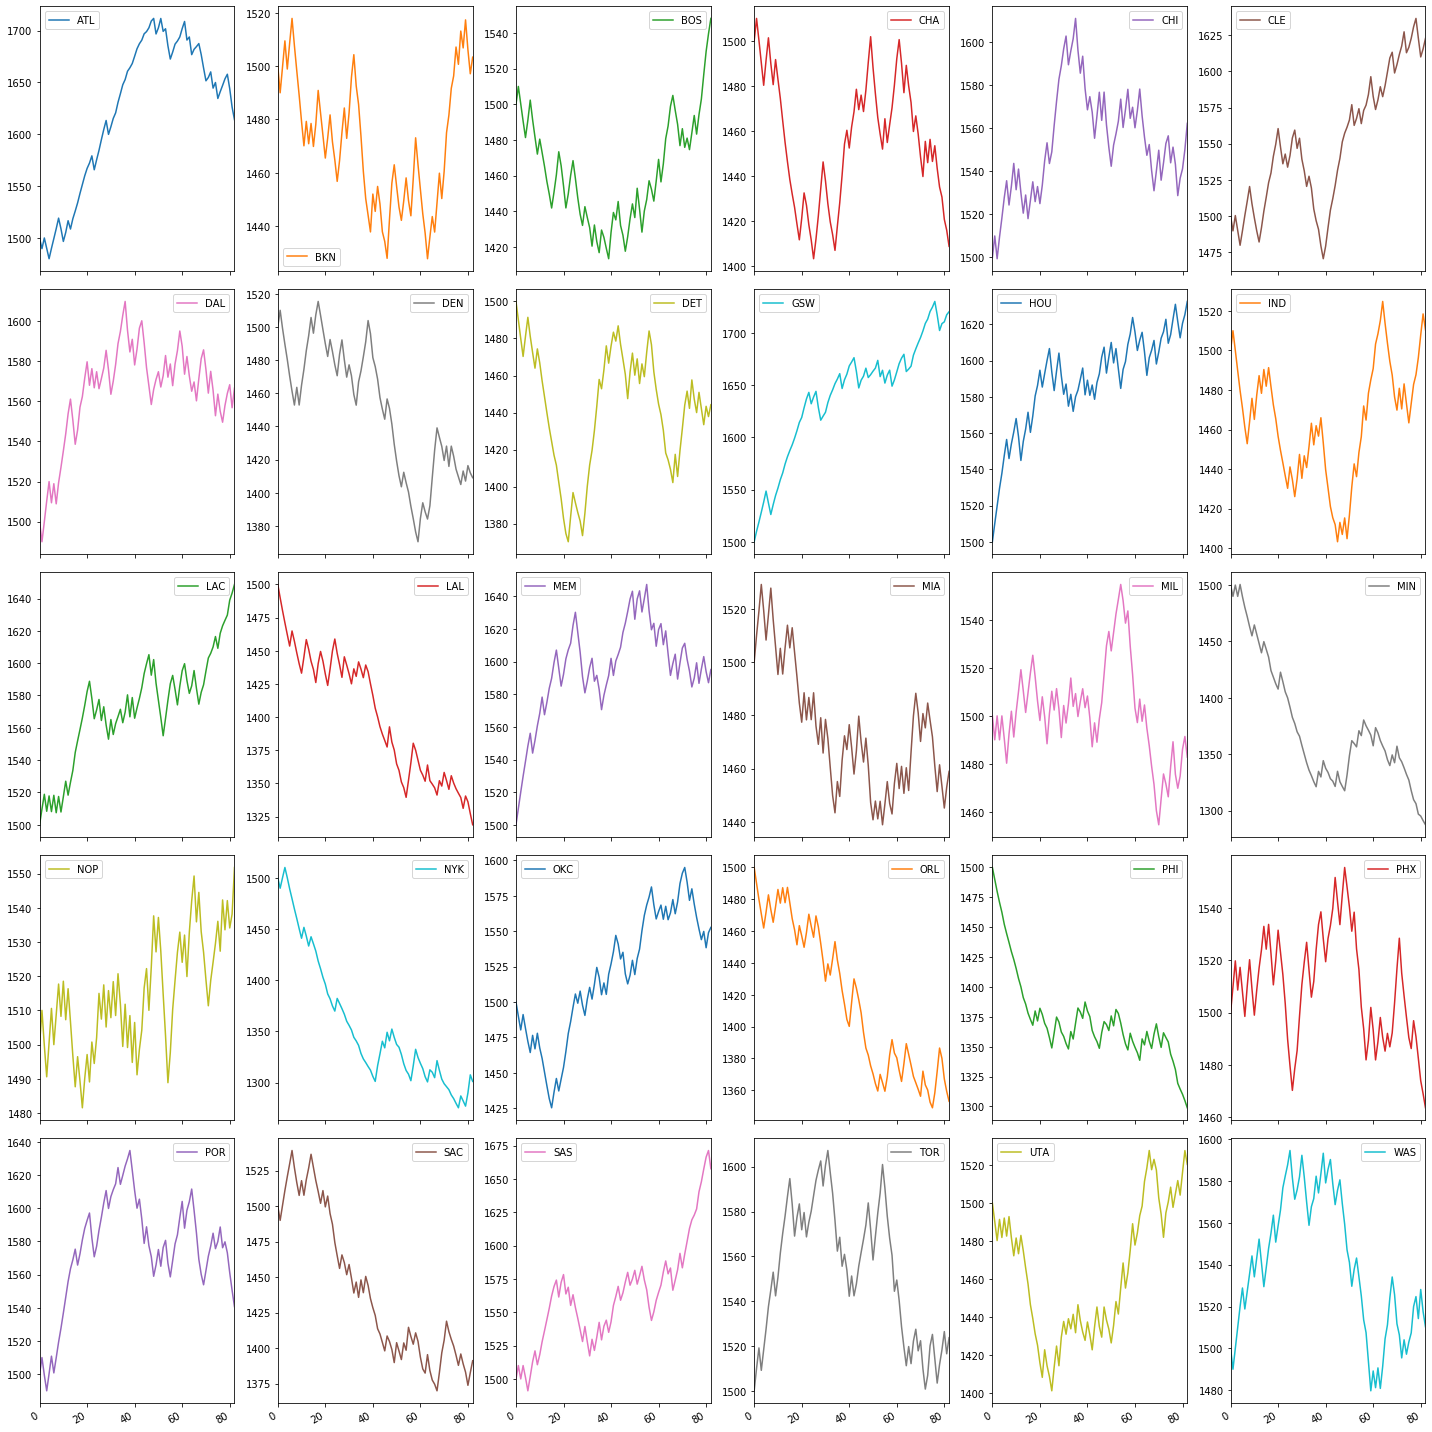

In [124]:
elo_standard_df.plot(subplots = True, layout = (5,6), figsize= (20, 20))
plt.tight_layout()
plt.show()